# Phase 2: Deep Learning Time Series Forecasting

This notebook builds a simple LSTM model using Keras to forecast the `TOTALDEMAND`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_parquet('../processed/master_dataset.parquet')
df.head()

,REGIONID,TOTALDEMAND,AVAILABLEGENERATION,AVAILABLELOAD,DISPATCHABLEGENERATION,DISPATCHABLELOAD,NETINTERCHANGE,INITIALSUPPLY,CLEAREDSUPPLY,RRP,...,PV_POWER,APPARENT_TEMP,IS_CALCULATED_APP_TEMP,PV_POWER_MISSING,DAY_TYPE_QLD,QLD_PUBLIC_HOLIDAY,TAS_PUBLIC_HOLIDAY,NSW_PUBLIC_HOLIDAY,VIC_PUBLIC_HOLIDAY,IS_QLD_SCHOOL_HOLIDAY
SETTLEMENTDATE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,NSW1,6912.65,11165.60657,57.0,6369.96,0.0,-542.69,6958.41699,6933.16,93.80,...,0.0,23.3,True,False,NWD,False,False,False,False,False
2023-01-01,QLD1,5804.16,8302.43201,75.0,5784.88,0.0,-19.28,5832.15381,5804.20,96.07,...,0.0,23.3,True,False,NWD,False,False,False,False,False
2023-01-01,SA1,1443.28,2893.74605,147.0,1466.12,0.0,22.84,1454.43481,1442.92,82.92,...,0.0,23.3,True,False,NWD,False,False,False,False,False
2023-01-01,TAS1,988.72,2322.76831,0.0,1443.07,0.0,454.35,1005.17883,1006.79,73.45,...,0.0,23.3,True,False,NWD,False,False,False,False,False
2023-01-01,VIC1,4740.34,8592.02719,125.0,4882.03,0.0,141.69,4806.31689,4758.98,84.20,...,0.0,23.3,True,False,NWD,False,False,False,False,False


## Prepare Data for LSTM

In [2]:
# Select and scale the target variable
data = df[df['REGIONID'] == 'QLD1']['TOTALDEMAND'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24 # Using 24 hours of data to predict the next hour
X, y = create_sequences(data_scaled, seq_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Build and Train the LSTM Model

In [3]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20


/Users/randomwalk/Documents/CODE/dev_ml/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1072/1072 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0157 - val_loss: 4.9490e-04
Epoch 2/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6471e-04 - val_loss: 5.3468e-04
Epoch 3/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6560e-04 - val_loss: 2.8478e-04
Epoch 4/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1841e-04 - val_loss: 2.6006e-04
Epoch 5/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8826e-04 - val_loss: 2.9394e-04
Epoch 6/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7892e-04 - val_loss: 2.4708e-04
Epoch 7/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5770e-04 - val_loss: 3.1159e-04
Epoch 8/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5799e-04 - val_loss: 2.4497e-04
Epoch 9/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5482e-04 - val_loss: 2.8529e-04
Epoch 10/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4404e-04 - val_loss: 2.3410e-04
Epoch 11/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

## Evaluate the Model

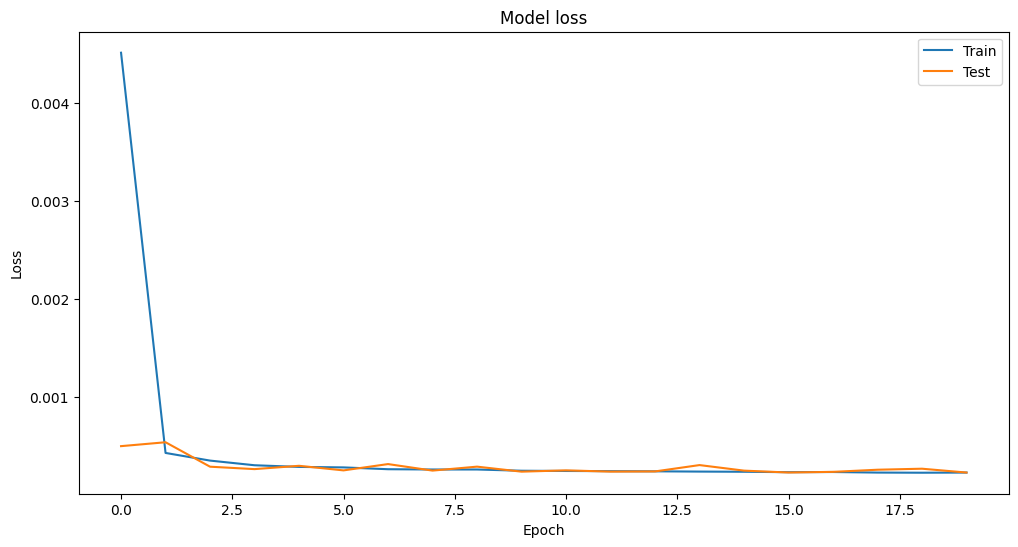

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step


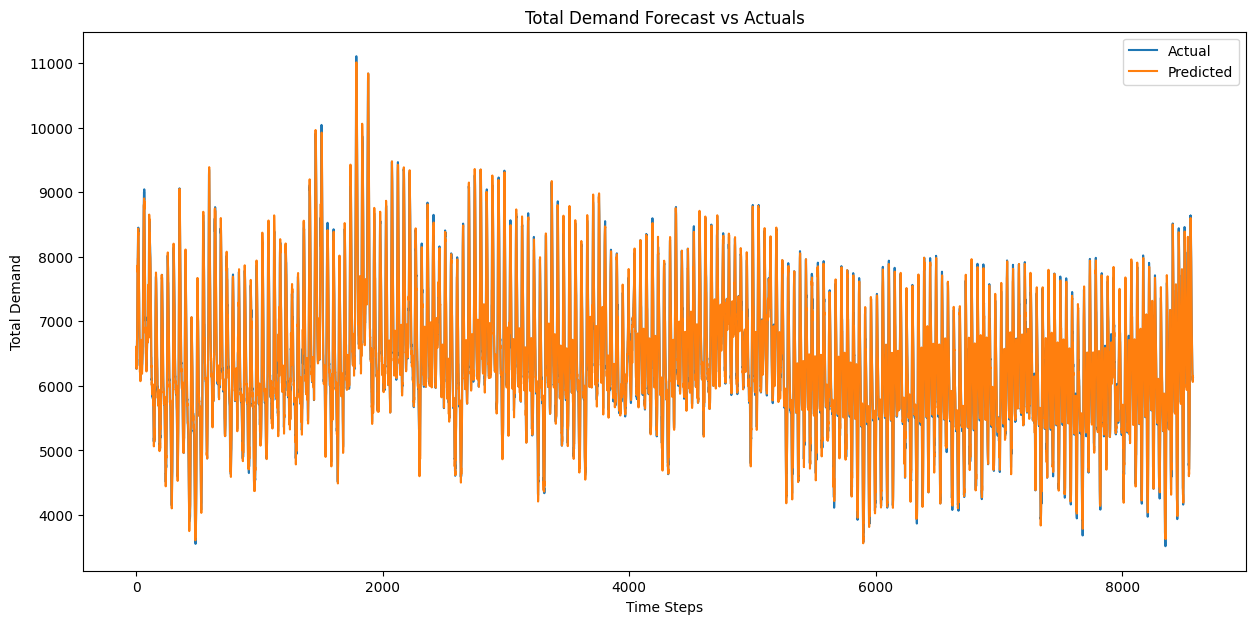

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Total Demand Forecast vs Actuals')
plt.ylabel('Total Demand')
plt.xlabel('Time Steps')
plt.legend()
plt.show()

In [6]:
## Generate a plotly report, of the predictions vs actuals, group by REGIONID
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test_inv)), y=y_test_inv.flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_inv)), y=y_pred_inv.flatten(), mode='lines', name='Predicted'))
fig.update_layout(title='Total Demand Forecast vs Actuals', xaxis_title='Time Steps', yaxis_title='Total Demand')
fig.show()

In [5]:
## Calculate some Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'Mean Absolute Percentage Error: {np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100:.2f}%')


Mean Squared Error: 14812.125657092407
Mean Absolute Error: 90.38366127004372
Root Mean Squared Error: 121.70507654610142
Mean Absolute Percentage Error: 1.45%
